In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import pylab
import scipy.stats as st
from sklearn.model_selection import train_test_split

In [2]:
toyota=pd.read_excel("E:\DS Assignments1\\Toyota.xlsx")
toyota.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86.0,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86.0,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86.0,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86.0,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110.0,0,...,0,0,1,0,0,0,0,0,0,0


In [3]:
toyota= toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [4]:
eda=toyota.describe()

In [5]:
eda

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1434.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.513250,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.987975,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x21cab436970>,
 'caps': [<matplotlib.lines.Line2D at 0x21caf9c1070>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cab436610>],
 'medians': [<matplotlib.lines.Line2D at 0x21caf9c1730>],
 'fliers': [<matplotlib.lines.Line2D at 0x21caf9c1a90>],
 'means': []}

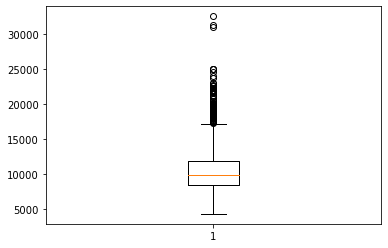

In [6]:
plt.boxplot(toyota["Price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21caf99d970>,
 'caps': [<matplotlib.lines.Line2D at 0x21caf955070>,
 'boxes': [<matplotlib.lines.Line2D at 0x21caf99d610>],
 'medians': [<matplotlib.lines.Line2D at 0x21caf955730>],
 'fliers': [<matplotlib.lines.Line2D at 0x21caf955a90>],
 'means': []}

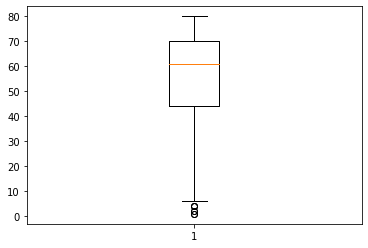

In [7]:
plt.boxplot(toyota["Age_08_04"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21cafa8ff70>,
 'caps': [<matplotlib.lines.Line2D at 0x21cafa9c670>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cafa8fc10>],
 'medians': [<matplotlib.lines.Line2D at 0x21cafa9cd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cafaa60d0>],
 'means': []}

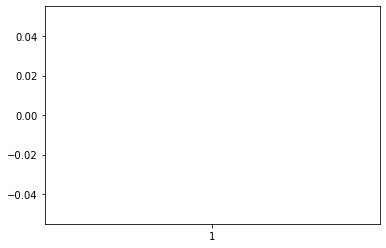

In [8]:
plt.boxplot(toyota["HP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21caf922fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21cafac1070>,
 'boxes': [<matplotlib.lines.Line2D at 0x21caf9445e0>],
 'medians': [<matplotlib.lines.Line2D at 0x21cafac56a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cafac5e80>],
 'means': []}

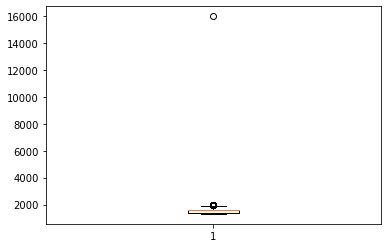

In [9]:
plt.boxplot(toyota["cc"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21cab3df3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x21cab3dfa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cab3df040>],
 'medians': [<matplotlib.lines.Line2D at 0x21cab3d3160>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cab3d34c0>],
 'means': []}

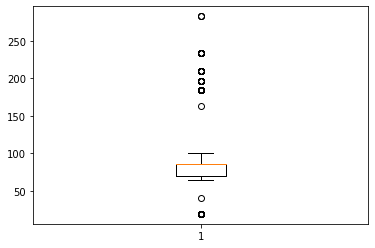

In [10]:
plt.boxplot(toyota["Quarterly_Tax"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21cafb2a4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x21cafb2ab80>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cafb2a160>],
 'medians': [<matplotlib.lines.Line2D at 0x21cafb34280>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cafb345e0>],
 'means': []}

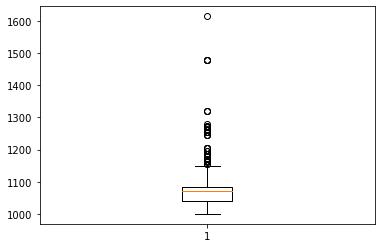

In [11]:
plt.boxplot(toyota["Weight"])

from the above we concluded that data is not normally distributed 
and Price, Age, KM, HP, Quarterly_Tax and Weight consist of outliers.

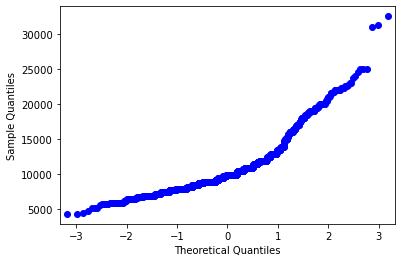

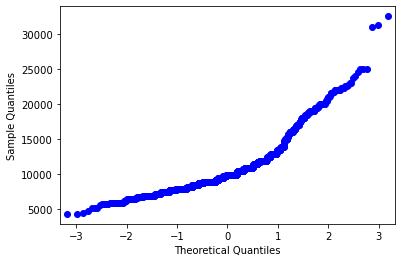

In [12]:
sm.graphics.qqplot(toyota["Price"])

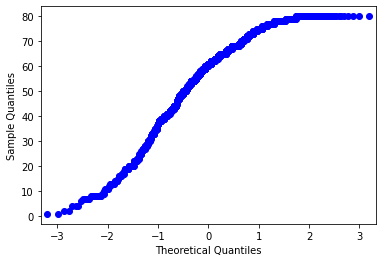

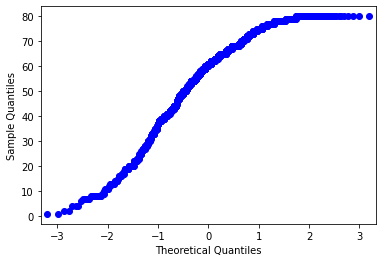

In [13]:
sm.graphics.qqplot(toyota["Age_08_04"])

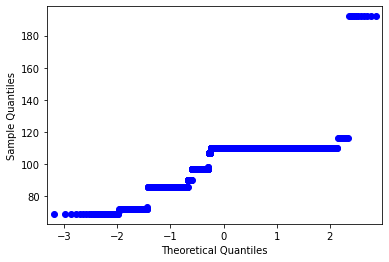

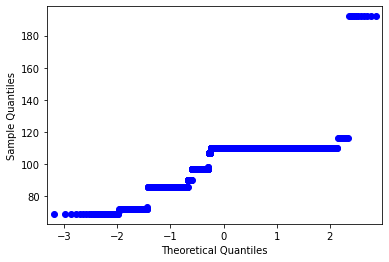

In [14]:
sm.graphics.qqplot(toyota["HP"])

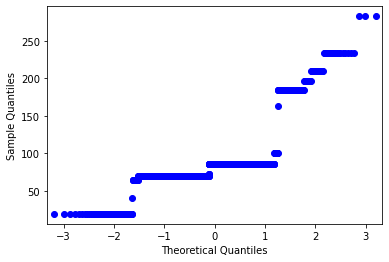

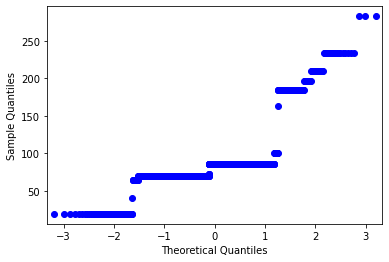

In [15]:
sm.graphics.qqplot(toyota["Quarterly_Tax"])

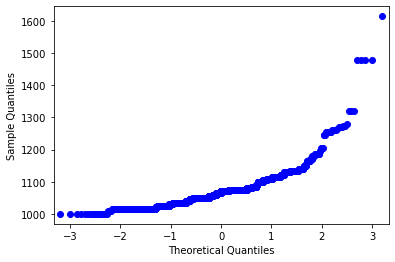

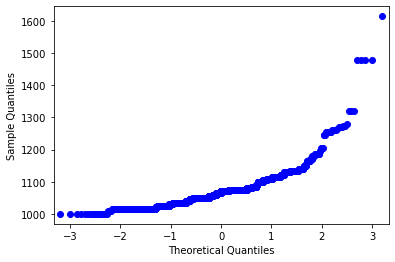

In [16]:
sm.graphics.qqplot(toyota["Weight"])

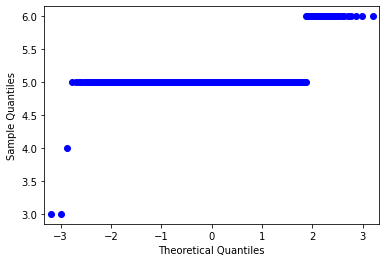

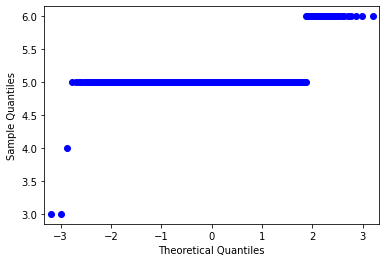

In [17]:
sm.graphics.qqplot(toyota["Gears"])

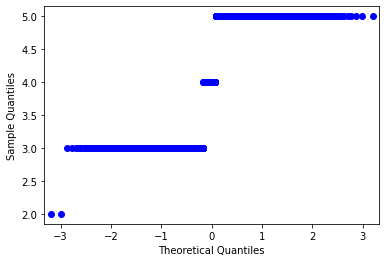

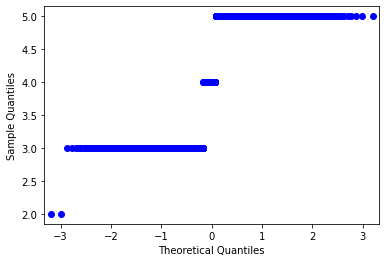

In [18]:
sm.graphics.qqplot(toyota["Doors"])

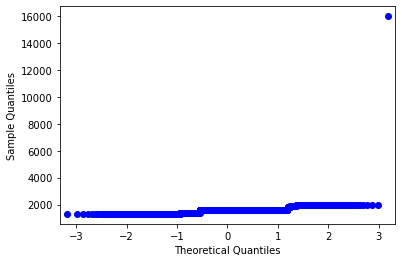

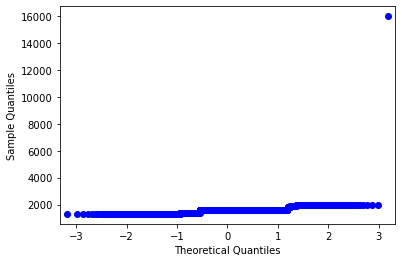

In [19]:
sm.graphics.qqplot(toyota["cc"])

The above data shows that price, age, and weight are not normal. 
Gears and doors are catgorical data whereas rest all are discrete data.

(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <BarContainer object of 10 artists>)

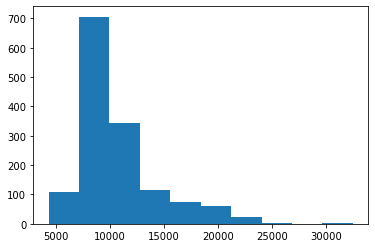

In [20]:
plt.hist(toyota["Price"])

(array([ 24.,  36.,  62.,  64., 108., 127., 182., 247., 287., 299.]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <BarContainer object of 10 artists>)

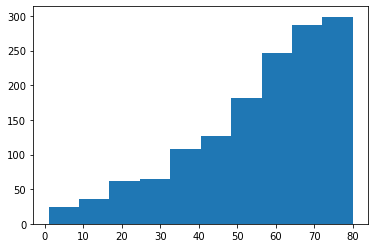

In [21]:
plt.hist(toyota["Age_08_04"])

(array([109., 284., 165., 865.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 69. ,  81.3,  93.6, 105.9, 118.2, 130.5, 142.8, 155.1, 167.4,
        179.7, 192. ]),
 <BarContainer object of 10 artists>)

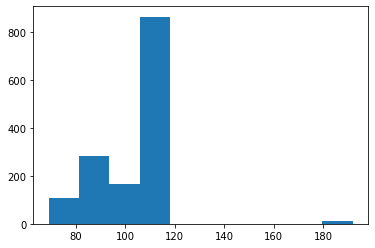

In [22]:
plt.hist(toyota["HP"])

(array([ 73., 577., 616.,  19.,   0.,   1., 110.,  18.,  19.,   3.]),
 array([ 19. ,  45.4,  71.8,  98.2, 124.6, 151. , 177.4, 203.8, 230.2,
        256.6, 283. ]),
 <BarContainer object of 10 artists>)

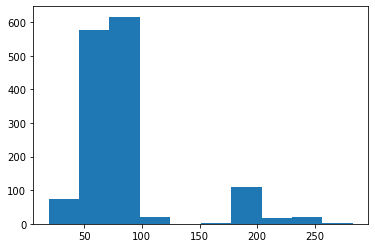

In [23]:
plt.hist(toyota["Quarterly_Tax"])

(array([664., 620., 107.,  18.,  19.,   3.,   0.,   4.,   0.,   1.]),
 array([1000. , 1061.5, 1123. , 1184.5, 1246. , 1307.5, 1369. , 1430.5,
        1492. , 1553.5, 1615. ]),
 <BarContainer object of 10 artists>)

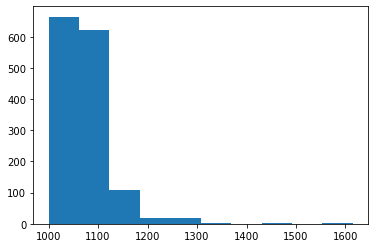

In [24]:
plt.hist(toyota["Weight"])

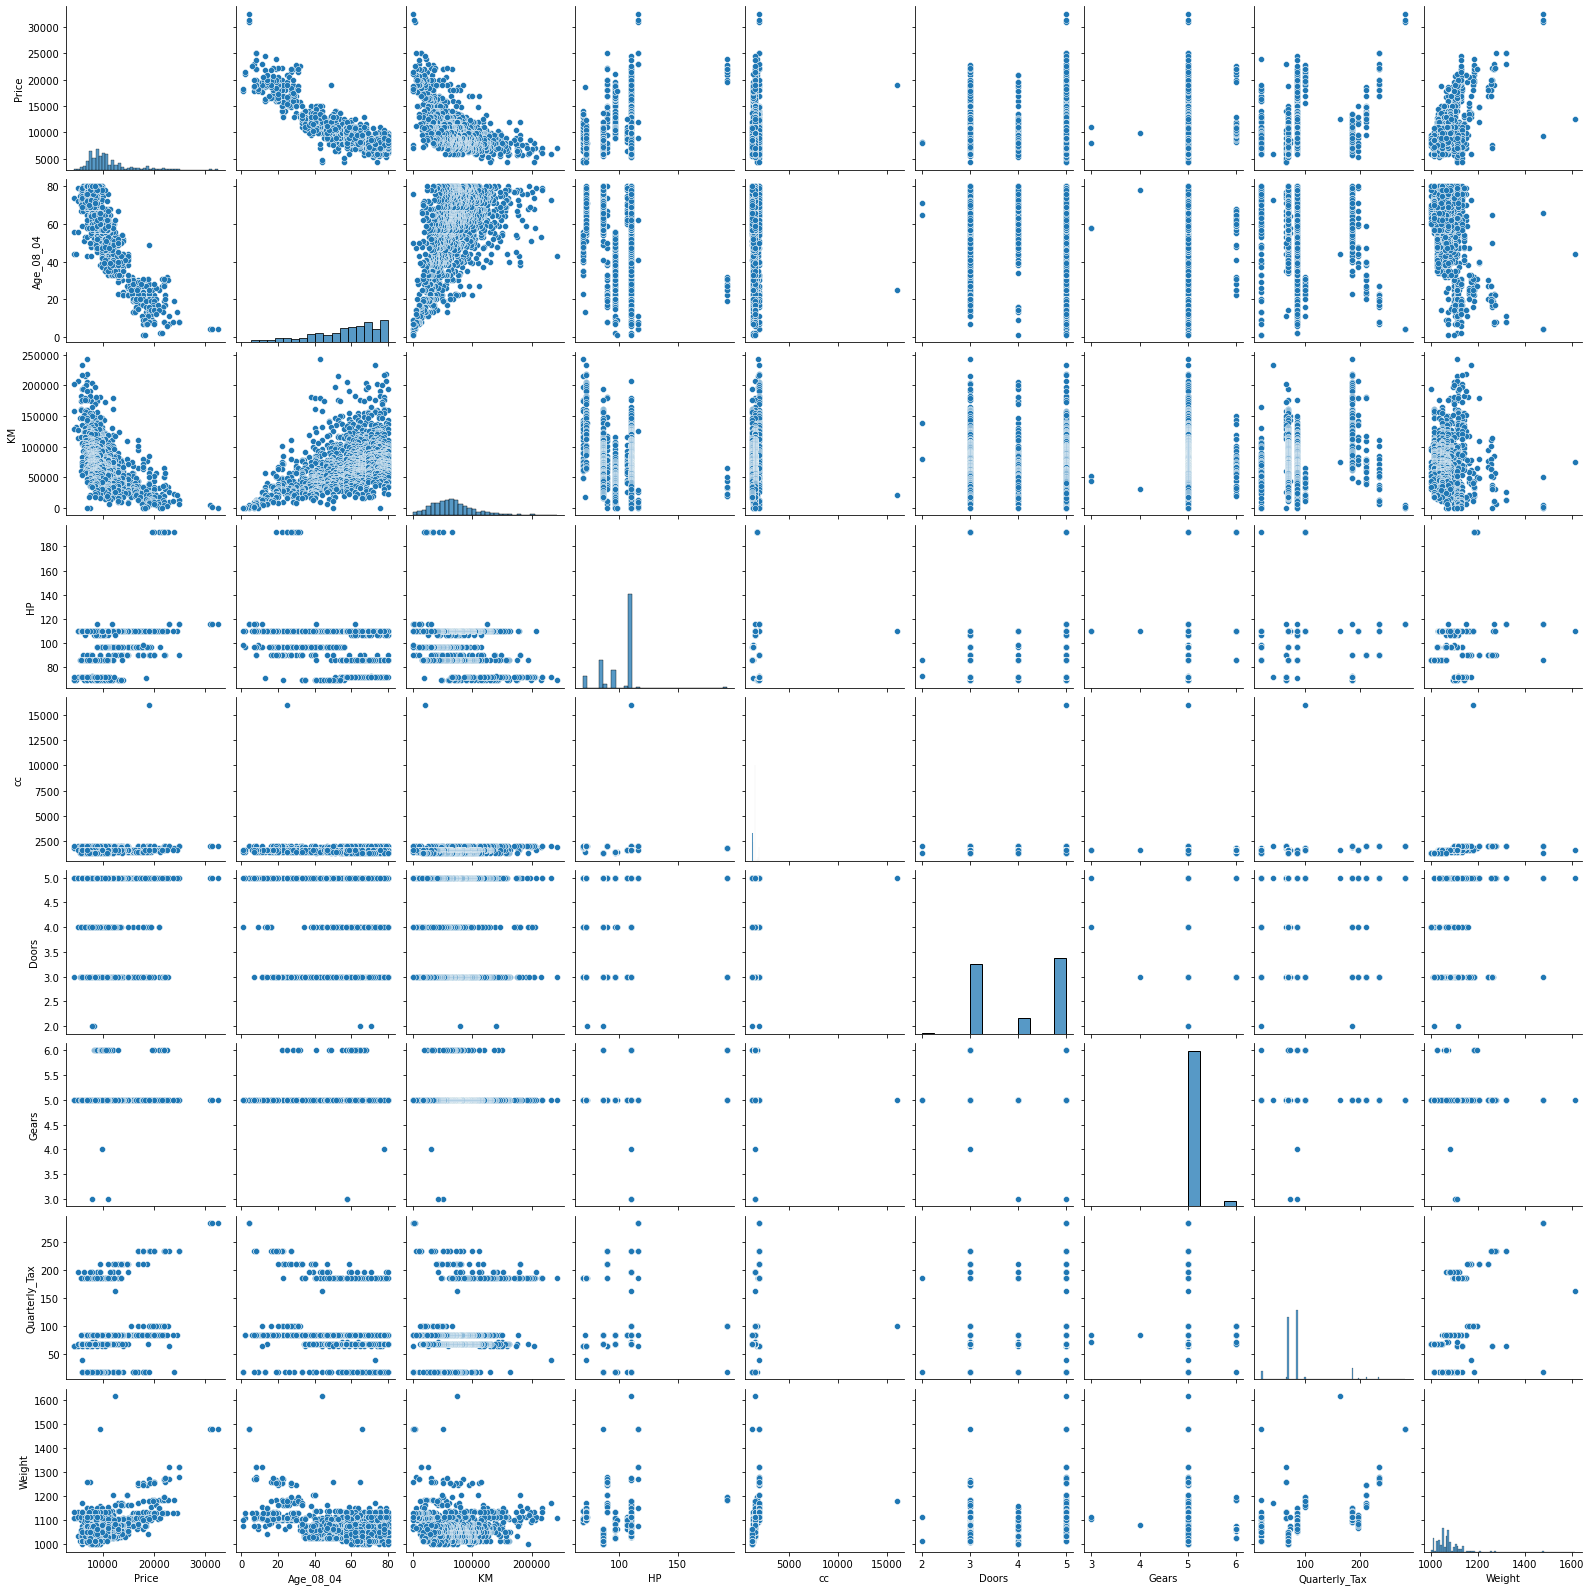

In [25]:
sns.pairplot(toyota)
correlation_values= toyota.corr()

In [26]:
model1= smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1126.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:05:52   Log-Likelihood:                -12358.
No. Observations:                1434   AIC:                         2.473e+04
Df Residuals:                    1425   BIC:                         2.478e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5511.7091   1411.853     -3.904      0.000   -8281.243   -2742.176
Age_08_04      -121.6427      2.616    -46.506      0.000    -126.774    -116.512
KM               -0.0208      0.001    -16.603      0.000      -0.023      -0.018
HP               31.7613      2.819     11.269      0.000      26.232      37.290
cc               -0.1196      0.090     -1.328      0.184      -0.296       0.057
Doors             2.4778     40.087      0.062      0.951     -76.158      81.113
Gears           598.2014    197.041      3.036      0.002     211.680     984.722
Quarterly_Tax     3.9246      1.310      2.996      0.003       1.355       6.495
Weight           16.8558      1.070     15.756      0.000      14.757      18.954
==============================================================================
Omnibus:                      149.170   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              993.165
Skew:                          -0.204   Prob(JB):                    2.17e-216
Kurtosis:                       7.056   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

from the above we saw that CC and Doors are insignificant

In [27]:
model1_cc = smf.ols("Price~cc",data= toyota).fit()
model1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.55e-06
Time:                        22:05:52   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model1_cc = smf.ols("Price~Doors",data= toyota).fit()
model1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.46e-12
Time:                        22:05:52   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model1_cc = smf.ols("Price~cc+Doors",data= toyota).fit()
model1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.15e-15
Time:                        22:05:52   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

from the above models we came to know that all the variables are significant.

In [30]:
toyota1= toyota.drop(toyota.index[[80]],axis=0) ##removing 80 and checking for significance

In [31]:
model2= smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1180.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:05:53   Log-Likelihood:                -12317.
No. Observations:                1433   AIC:                         2.465e+04
Df Residuals:                    1424   BIC:                         2.470e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6223.4898   1383.364     -4.499      0.000   -8937.141   -3509.839
Age_08_04      -120.4522      2.562    -47.017      0.000    -125.478    -115.427
KM               -0.0178      0.001    -13.964      0.000      -0.020      -0.015
HP               39.3927      2.911     13.531      0.000      33.682      45.104
cc               -2.5166      0.307     -8.187      0.000      -3.120      -1.914
Doors           -23.5132     39.329     -0.598      0.550    -100.663      53.636
Gears           527.6430    192.874      2.736      0.006     149.296     905.990
Quarterly_Tax     9.0034      1.425      6.318      0.000       6.208      11.799
Weight           20.0624      1.118     17.947      0.000      17.870      22.255
==============================================================================
Omnibus:                      242.003   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2631.591
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.584   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

from the above we came to know that Doors is insignificant.

In [32]:
toyota2 = toyota.drop(toyota.index[[80,221]],axis=0) ##removing 80 and 221, where 221 is the next most influencing index

In [33]:
model3= smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota2).fit()
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1273.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:05:53   Log-Likelihood:                -12262.
No. Observations:                1432   AIC:                         2.454e+04
Df Residuals:                    1423   BIC:                         2.459e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.019e+04   1397.076     -7.293      0.000   -1.29e+04   -7447.835
Age_08_04      -116.5930      2.509    -46.466      0.000    -121.515    -111.671
KM               -0.0173      0.001    -13.958      0.000      -0.020      -0.015
HP               39.3292      2.817     13.962      0.000      33.804      44.855
cc               -3.1975      0.305    -10.475      0.000      -3.796      -2.599
Doors           -62.3395     38.255     -1.630      0.103    -137.382      12.703
Gears           488.0794    186.660      2.615      0.009     121.922     854.237
Quarterly_Tax     7.9383      1.383      5.740      0.000       5.225      10.651
Weight           24.9501      1.189     20.986      0.000      22.618      27.282
==============================================================================
Omnibus:                      194.813   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1724.050
Skew:                          -0.306   Prob(JB):                         0.00
Kurtosis:                       8.340   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Doors is insignificant


In [34]:

#removing 80,221,960, where 960 is the next most influencing index after 80,221
toyota3= toyota.drop(toyota.index[[80,221,960]],axis=0)

In [35]:
model4= smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = toyota3).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1364.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:05:53   Log-Likelihood:                -12209.
No. Observations:                1431   AIC:                         2.444e+04
Df Residuals:                    1422   BIC:                         2.448e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.468e+04   1435.174    -10.230      0.000   -1.75e+04   -1.19e+04
Age_08_04      -112.0465      2.480    -45.172      0.000    -116.912    -107.181
KM               -0.0170      0.001    -14.151      0.000      -0.019      -0.015
HP               36.6419      2.747     13.339      0.000      31.254      42.030
cc               -3.7884      0.303    -12.522      0.000      -4.382      -3.195
Doors          -120.2247     37.603     -3.197      0.001    -193.988     -46.462
Gears           467.2041    181.071      2.580      0.010     112.009     822.399
Quarterly_Tax     5.2009      1.372      3.791      0.000       2.510       7.892
Weight           30.5512      1.295     23.593      0.000      28.011      33.091
==============================================================================
Omnibus:                      120.921   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.444
Skew:                          -0.077   Prob(JB):                    5.88e-152
Kurtosis:                       6.414   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that all the variables are significant by observing above.

In [36]:
# Building the "Final Model".
MODEL_FINAL = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = toyota3).fit()
MODEL_FINAL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1364.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:05:53   Log-Likelihood:                -12209.
No. Observations:                1431   AIC:                         2.444e+04
Df Residuals:                    1422   BIC:                         2.448e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.468e+04   1435.174    -10.230      0.000   -1.75e+04   -1.19e+04
Age_08_04      -112.0465      2.480    -45.172      0.000    -116.912    -107.181
KM               -0.0170      0.001    -14.151      0.000      -0.019      -0.015
HP               36.6419      2.747     13.339      0.000      31.254      42.030
cc               -3.7884      0.303    -12.522      0.000      -4.382      -3.195
Doors          -120.2247     37.603     -3.197      0.001    -193.988     -46.462
Gears           467.2041    181.071      2.580      0.010     112.009     822.399
Quarterly_Tax     5.2009      1.372      3.791      0.000       2.510       7.892
Weight           30.5512      1.295     23.593      0.000      28.011      33.091
==============================================================================
Omnibus:                      120.921   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.444
Skew:                          -0.077   Prob(JB):                    5.88e-152
Kurtosis:                       6.414   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
MODEL_FINAL_pred = MODEL_FINAL.predict(toyota3)

Text(0, 0.5, 'Predicted values')

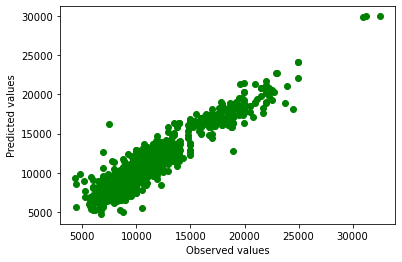

In [38]:
plt.scatter(toyota3["Price"],MODEL_FINAL_pred,c='g');plt.xlabel("Observed values");plt.ylabel("Predicted values")

from the above we concluded that observed values and fitted values follows linearity.

((array([-3.29951382, -3.04189962, -2.89861314, ...,  2.89861314,
          3.04189962,  3.29951382]),
  array([-7.09464478, -4.59935865, -4.13755394, ...,  4.01275659,
          5.00193041,  5.12144519])),
 (0.9842656355428412, -4.985269474938473e-13, 0.9853729939904209))

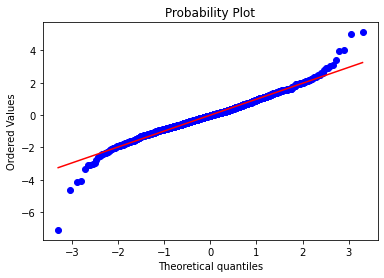

In [39]:
st.probplot(MODEL_FINAL.resid_pearson, dist='norm',plot=pylab)

From the above we concluded that errors are normally distributed

In [40]:
train_data,test_Data= train_test_split(toyota,test_size=0.3)

In [41]:
MODEL_FINAL1 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = train_data).fit()
MODEL_FINAL1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     770.6
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:05:54   Log-Likelihood:                -8671.7
No. Observations:                1004   AIC:                         1.736e+04
Df Residuals:                     995   BIC:                         1.741e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2342.7717   1697.857     -1.380      0.168   -5674.563     989.019
Age_08_04      -123.4787      3.213    -38.434      0.000    -129.783    -117.174
KM               -0.0202      0.002    -13.205      0.000      -0.023      -0.017
HP               37.1004      3.393     10.935      0.000      30.442      43.758
cc               -0.0694      0.093     -0.746      0.456      -0.252       0.113
Doors            -1.3899     48.988     -0.028      0.977     -97.521      94.742
Gears           166.9808    257.470      0.649      0.517    -338.266     672.228
Quarterly_Tax     5.1031      1.570      3.249      0.001       2.021       8.185
Weight           15.3067      1.205     12.701      0.000      12.942      17.672
==============================================================================
Omnibus:                      105.837   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.122
Skew:                          -0.099   Prob(JB):                    9.71e-168
Kurtosis:                       7.283   Cond. No.                     3.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
##PREDICTION
MODEL_FINAL_pred = MODEL_FINAL1.predict(train_data)
MODEL_FINAL_pred

1078     7493.778698
882      9012.893280
1049     5240.057107
224     13584.466209
762      8842.359830
            ...     
117     18941.273935
472     10294.434669
1307     7977.556155
1272     9471.160535
868      9022.991952
Length: 1005, dtype: float64

In [43]:
#TRAIN_RESIDUALS
MODEL_FINAL_res = train_data["Price"]-MODEL_FINAL_pred
MODEL_FINAL_res

1078     456.221302
882     -262.893280
1049    1509.942893
224    -1134.466209
762     1052.640170
           ...     
117    -1041.273935
472     -344.434669
1307    1972.443845
1272   -1021.160535
868      927.008048
Length: 1005, dtype: float64

In [44]:
##TRAIN_RMSE
MODEL_FINAL_rmse = np.sqrt(np.mean(MODEL_FINAL_res*MODEL_FINAL_res))
MODEL_FINAL_rmse

1363.9901266884476

In [45]:
##TEST_PREDICTION
MODEL_FINAL_testpred = MODEL_FINAL1.predict(test_Data)
MODEL_FINAL_testpred

790      9725.201569
1012     9992.452324
574     11276.188199
994      8706.043337
467     11310.309057
            ...     
96      16320.329849
143     17182.520457
773      9499.477763
423     10920.864017
448      9612.158202
Length: 431, dtype: float64

In [46]:
##TEST RESIDUALS
MODEL_FINAL_testres= test_Data["Price"]-MODEL_FINAL_testpred
MODEL_FINAL_testres

790     -225.201569
1012     -42.452324
574    -1296.188199
994     -956.043337
467      639.690943
           ...     
96      -370.329849
143     1317.479543
773     1450.522237
423      579.135983
448     1837.841798
Length: 431, dtype: float64

In [47]:
##TEST_RMSE
MODEL_FINAL_testrmse = np.sqrt(np.mean(MODEL_FINAL_testres*MODEL_FINAL_testres))
MODEL_FINAL_testrmse

1289.3898689041907